In [1]:
import numpy as np
import pandas as pd
import import_ipynb
from deep_learning_equations import model,forward_propagation_deep,init_parameters_deep_normal,compute_cost,testing
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix

importing Jupyter notebook from deep_learning_equations.ipynb
(array([1.1, 0. , 0.9]), array([1.1, 0. , 0.9]))


In [2]:
df=pd.read_csv("train.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [53]:
Y=df["Survived"][0:666].values
Y=Y.reshape(1,-1)
print(Y.shape)

(1, 666)


In [32]:
df["Male"] = df["Sex"] == "male"
numpyArr = df.values
numpyMask = df["Male"].values
print(numpyArr[numpyMask])

[[1 0 3 ... nan 'S' True]
 [5 0 3 ... nan 'S' True]
 [6 0 3 ... nan 'Q' True]
 ...
 [887 0 2 ... nan 'S' True]
 [890 1 1 ... 'C148' 'C' True]
 [891 0 3 ... nan 'Q' True]]


In [26]:
df["Male"]=df["Sex"]=="male"
converted=df["Male"].astype(int)
df["Male"]=converted

In [55]:
df.Age.fillna((df["Age"].mean()),inplace=True)
df.Pclass.fillna((df["Pclass"].mean()),inplace=True)
df.Male.fillna((df["Male"].mean()),inplace=True)
df.SibSp.fillna((df["SibSp"].mean()),inplace=True)
df.Parch.fillna((df["Parch"].mean()),inplace=True)
df.Fare.fillna((df["Fare"].mean()),inplace=True)
df["Age"]=df["Age"]/df["Age"].max()
df['Fare']=df["Fare"]/df["Fare"].max()
print(df["Fare"])

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64


In [56]:
print(Y.shape)

(1, 666)


In [57]:
X=(df[["Pclass","Male","Age","SibSp","Parch","Fare"]][0:666]).values
X=X.T
assert(np.isnan(X).any()==False)
print(type(X))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(6, 666)
(1, 666)


Cost after 0 iteration: 0.7197220834777
Cost after 100 iteration: 0.5086037508378665
Cost after 200 iteration: 0.44996762598373063
Cost after 300 iteration: 0.44480046027467585
Cost after 400 iteration: 0.44409973349601434
Cost after 500 iteration: 0.443635227515113
Cost after 600 iteration: 0.44359221444078045
Cost after 700 iteration: 0.4434603325820129
Cost after 800 iteration: 0.4433855372119038
Cost after 900 iteration: 0.44330122142647027
Cost after 1000 iteration: 0.4432618595091134
Cost after 1100 iteration: 0.44321518024923434
Cost after 1200 iteration: 0.44324646825851033
Cost after 1300 iteration: 0.4432225287119144
Cost after 1400 iteration: 0.44320444598209785
Cost after 1500 iteration: 0.4431407198241352
Cost after 1600 iteration: 0.4430855947440551
Cost after 1700 iteration: 0.44304941504378637
Cost after 1800 iteration: 0.4430101378008311
Cost after 1900 iteration: 0.443119645124614
Cost after 2000 iteration: 0.4429863841290109
Cost after 2100 iteration: 0.4429697146225

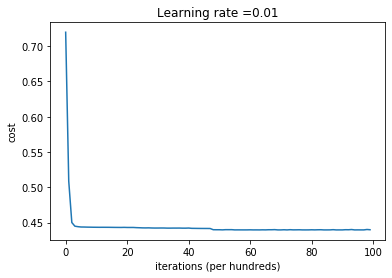

In [70]:
parameters=model(X,Y,[6,6,3,3,1],"relu","sigmoid",10000,0.01,printcost=True,init="he",keep_prob=1.0,lambd=1.5,epsilon=0,grad_desc="adam")
result,_=forward_propagation_deep(X, parameters, "relu", "sigmoid")

In [71]:
def testingpseudo(X,Y,parameters,activation1,activation_final):
    """input:
    parameters= a dictionary of parameters that have been trained previously
    layerdims=a list containing the amount of nodes in each layer
    result= matrix containing the target value
    activation1=the activation function for layer 1 - layer L-1
    activation2=the activation function for layer L
    
    
    Output:
    accuracy=the accuracy of the output that is given by the model"""
    AL,caches=forward_propagation_deep(X, parameters, activation1, activation_final)
    m=int(AL.shape[1])
    output=np.zeros((1,m))
    
    for i in range(0,m):
        if AL[0,i]>0.5:
            output[0,i]=1
        else:
            output[0,i]=0
    accuracy=np.sum((output==Y)/m)
    return accuracy

In [72]:
accuracy=testingpseudo(X,Y,parameters,"relu","sigmoid")

In [73]:
print(accuracy)

0.8243243243243243


In [25]:
Xtest=df[["Pclass","Male","Age","SibSp","Parch","Fare"]][666:].values
Xtest=Xtest.T
print(Xtest.shape)

Ytest=df["Survived"][666:].values
Ytest.reshape(1,-1)
print(Ytest.shape)

(6, 225)
(225,)


In [ ]:
accuracy=testingpseudo(Xtest,Ytest,parameters,"relu","sigmoid")

In [ ]:
print(accuracy)
testdf=pd.read_csv("test.csv")
testdf["Male"]=(testdf["Sex"]=="male").astype(int)
testdf.Age.fillna((df["Age"].mean()),inplace=True)
testdf.Pclass.fillna((df["Pclass"].mean()),inplace=True)
testdf.Male.fillna((df["Male"].mean()),inplace=True)
testdf.SibSp.fillna((df["SibSp"].mean()),inplace=True)
testdf.Parch.fillna((df["Parch"].mean()),inplace=True)
testdf.Fare.fillna((df["Fare"].mean()),inplace=True)
Xpredict=testdf[["Pclass","Male","Age","SibSp","Parch","Fare"]].values
Xpredict=Xpredict.T

print(Xpredict.shape)

In [ ]:
def predict(X,parameters,activation1,activation_final):
    AL,caches=forward_propagation_deep(X, parameters, activation1, activation_final)
    m=int(AL.shape[1])
    output=np.zeros((1,m))
    
    for i in range(0,m):
        if AL[0,i]>0.5:
            output[0,i]=1
        else:
            output[0,i]=0
    return output

In [ ]:
tfpredict=predict(Xpredict,parameters,"relu","sigmoid")

In [ ]:
m=Xpredict.shape[1]
print("Survived: ")
count=0
for i in range(0,m):
    if tfpredict[0,i]==1:
        count+=1
        print(df["Name"][i])
print("amount: "+str(count))
print("\n\nNot survived:")
count=0
for i in range(0,m):
    if tfpredict[0,i]==0:
        count+=1
        print(df["Name"][i])
print("amount: "+str(count))

In [ ]:
Bryan=np.array([[1],[1],[60],[0],[0],[100]])
Bryanpredict=predict(Bryan,parameters,"relu","sigmoid")

In [ ]:
print(Bryanpredict)

In [ ]:
data={'PassengerId':testdf["PassengerId"],
     'Survived':np.squeeze(tfpredict)}
submission=pd.DataFrame(data)
submission.to_csv('submission.csv')

In [ ]:
ymeasure=df["Survived"]
Xmeasure=df[["Pclass","Male","Age","SibSp","Parch","Fare"]].values
Xmeasure=Xmeasure.T
Ymeasure_pred=predict(Xmeasure,parameters,"relu","sigmoid")
Ymeasure_pred=Ymeasure_pred.T
print("accuracy: "+str(accuracy_score(ymeasure,Ymeasure_pred)))
print("precision: "+str(precision_score(ymeasure,Ymeasure_pred)))
print("recall: "+str(recall_score(ymeasure,Ymeasure_pred)))
print("f1: "+str(f1_score(ymeasure,Ymeasure_pred)))
print(confusion_matrix(ymeasure,Ymeasure_pred))